In [1]:
import numpy as np
import matplotlib.pyplot as plt

hP = 6.6260688e-27 # Planck's const / erg s
hbar = hP/2*np.pi
G = 6.67384e-8 # cm^3/g/s^2
c = 2.99792458e10 # speed of light  / cm/s
kB = 1.3806488e-16 # Boltzmann const / erg/K
mH = 1.66053892e-24 # atomic mass unit / g
me = 9.1093898e-28 # electron mass / g
mp = 1.676e-24 #proton mass [g] 
mu = 0.615 #mean molecular weight
alphaEM = 1/137.0359895 # fine structure constant
sigmaT = 8*np.pi/3*(alphaEM*hbar/me/c)**2 # Thomson cross section / cm^2
a_rad =  np.pi**2/15*kB*(kB/hbar/c)**3 # radiation const / erg/cm^3/K^4
stefan = a_rad*c/4 # Stefan-Boltzmann const / erg/cm^2/s/K^4
eV = 1.60217733e-12 # 1 electron volt / erg
keV = 1e3*eV
Msun = 1.98892e33 # solar mass / g
Msun = 1.98892e33 # solar mass / g
LEsun = 4*np.pi*c*G*Msun*mH/sigmaT # Eddington luminosity / erg/s
MEsun = LEsun/c**2
pc = 3.08567758e18 # 1 parsec / cm

kappa_es = 0.4 # opacity by electron scattering / cm^2/g
kappa_0 = 6.45e22 # krammers opacity at (rho,T)=(1,1) in cgs
nu_0 = 2.4e21*15 # electron-ion coupling (Coulomb log = 15)

In [ ]:
sigmaT

6.480089171809357e-23

REDUNDANT ALREADY ADDED IT TO THE CLASS

In [2]:
def schwarz(M):
    '''
    give M in Msuns
    out in cms
    '''
    return 2*G*(M*Msun)/(c**2)

def m_edd(M):
    '''
    give M in MSuns
    out in g/s
    '''
    epsilon = 0.1
    return (4*np.pi*G*(M)*mH)/(epsilon*c*sigmaT)


def omega(M,r):
    '''
    M in Msun
    r in rschwarz
    '''
    return (G*M*Msun/((r*schwarz(M))**3))**0.5


def domega_dr(M,r):
    '''
    M in Msun
    r in rschwarz
    '''
    return (-1.5)*(G*M*Msun/((r*schwarz(M))**5))**0.5


def d2omega_d2r(M,r):
    '''
    M in Msun
    r in rschwarz
    '''
    return (15/4)*(G*M*Msun/((r*schwarz(M))**7))**0.5

def sigma_ana(Mdot,r,r_star,nu):
    '''
    Mdot in msun/second
    r in schwarz
    r_star in schwarz
    '''
    
    return (Mdot*Msun/(3*np.pi*nu))*(1-(r_star/r)**0.5)




In [ ]:
(m_edd(1.5))*60*60*24*365

3.3910242427129244e-10

In [ ]:
def dsigma_dr(r,sigma,M,Mdot,nu):
    
    m = M*Msun
    mdot = Mdot*Msun
    R = r*schwarz(M)
    
    num = 2*mdot*R*omega(M,r) + mdot*R**2*domega_dr(M,r) - 6*np.pi*R**2*nu*sigma*domega_dr(M,r) - 2*np.pi*R**3*nu*sigma*d2omega_d2r(M,r)
    #num = 2*(r*schwarz(M))*(Mdot*Msun) + domega_dr(M,r) - 2*np.pi*nu*(r*schwarz(M))**3*sigma*d2omega_d2r(M,r) - 4*np.pi*sigma*nu*domega_dr(M,r)*(r*schwarz(M))**2
    
    den = -2*np.pi*nu*domega_dr(M,r)*R**3
    
    return np.divide(num,den)


# RK-4 Solution

In my original notebook, both the numerical as well as the analytical solution had the same shape, but since I have rewritten it (the old one got deleted as I messaged Prof. Wise on teams), the numerical one is flipped for some reason. I am still trying to figure this out. I suspect it must have something to do with units/ not keeping track of the units

In [ ]:
M = 10
Mdot = m_edd(10)/Msun
nu = 0.5
r_star = 3

In [ ]:
N = 1000
r0 = 2
r_end = 10
h = (r_end-r0)/N
r = np.arange(r0,r_end,h)
sigmas = np.zeros(N)
s0 = 0
sigmas[0] = 0
#r = r0
for i in range (1,N):
    s = sigmas[i]
    k1 = h * dsigma_dr(r[i],s,M,Mdot,nu)
    k2 = h * dsigma_dr(r[i] + 0.5 * h, s + 0.5 * k1,M,Mdot,nu)
    k3 = h * dsigma_dr(r[i] + 0.5 * h, s + 0.5 * k2,M,Mdot,nu)
    k4 = h * dsigma_dr(r[i] + h, s + k3,M,Mdot,nu)
    
    sigmas[i] = s + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

In [ ]:
sigmas

array([0.00000000e+00, 1.02386522e-26, 1.01981029e-26, 1.01578736e-26,
       1.01179605e-26, 1.00783597e-26, 1.00390678e-26, 1.00000810e-26,
       9.96139589e-27, 9.92300891e-27, 9.88491665e-27, 9.84711573e-27,
       9.80960282e-27, 9.77237463e-27, 9.73542795e-27, 9.69875958e-27,
       9.66236640e-27, 9.62624532e-27, 9.59039330e-27, 9.55480735e-27,
       9.51948450e-27, 9.48442187e-27, 9.44961657e-27, 9.41506579e-27,
       9.38076675e-27, 9.34671671e-27, 9.31291296e-27, 9.27935284e-27,
       9.24603372e-27, 9.21295303e-27, 9.18010821e-27, 9.14749674e-27,
       9.11511616e-27, 9.08296400e-27, 9.05103788e-27, 9.01933540e-27,
       8.98785424e-27, 8.95659207e-27, 8.92554663e-27, 8.89471567e-27,
       8.86409696e-27, 8.83368834e-27, 8.80348764e-27, 8.77349273e-27,
       8.74370153e-27, 8.71411196e-27, 8.68472198e-27, 8.65552958e-27,
       8.62653278e-27, 8.59772961e-27, 8.56911814e-27, 8.54069647e-27,
       8.51246271e-27, 8.48441501e-27, 8.45655153e-27, 8.42887046e-27,
      

In [ ]:
Mdot*Msun

7.168578223221978e-17

In [ ]:
k2

2.0608384351263984e-27

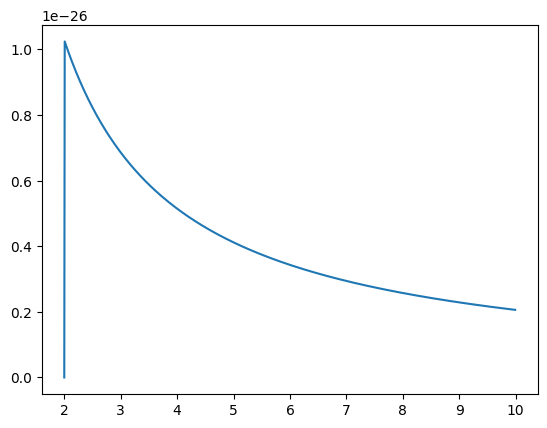

In [ ]:
plt.plot(r,sigmas)
#plt.plot(r,sigmas)

In [ ]:
dsigma_dr(r[2],sigmas[2],M,Mdot,nu)

1.2772904892074443e-24

In [ ]:
r

array([2.   , 2.008, 2.016, 2.024, 2.032, 2.04 , 2.048, 2.056, 2.064,
       2.072, 2.08 , 2.088, 2.096, 2.104, 2.112, 2.12 , 2.128, 2.136,
       2.144, 2.152, 2.16 , 2.168, 2.176, 2.184, 2.192, 2.2  , 2.208,
       2.216, 2.224, 2.232, 2.24 , 2.248, 2.256, 2.264, 2.272, 2.28 ,
       2.288, 2.296, 2.304, 2.312, 2.32 , 2.328, 2.336, 2.344, 2.352,
       2.36 , 2.368, 2.376, 2.384, 2.392, 2.4  , 2.408, 2.416, 2.424,
       2.432, 2.44 , 2.448, 2.456, 2.464, 2.472, 2.48 , 2.488, 2.496,
       2.504, 2.512, 2.52 , 2.528, 2.536, 2.544, 2.552, 2.56 , 2.568,
       2.576, 2.584, 2.592, 2.6  , 2.608, 2.616, 2.624, 2.632, 2.64 ,
       2.648, 2.656, 2.664, 2.672, 2.68 , 2.688, 2.696, 2.704, 2.712,
       2.72 , 2.728, 2.736, 2.744, 2.752, 2.76 , 2.768, 2.776, 2.784,
       2.792, 2.8  , 2.808, 2.816, 2.824, 2.832, 2.84 , 2.848, 2.856,
       2.864, 2.872, 2.88 , 2.888, 2.896, 2.904, 2.912, 2.92 , 2.928,
       2.936, 2.944, 2.952, 2.96 , 2.968, 2.976, 2.984, 2.992, 3.   ,
       3.008, 3.016,

# Analytical

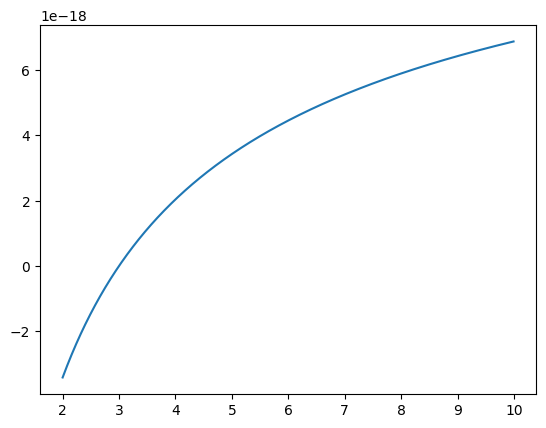

In [ ]:
M = 10
#r = np.linspace(3,10,100)
Mdot = m_edd(10)/Msun
nu = 0.5
r_star = 3

density = sigma_ana(Mdot,r,r_star,nu)
plt.plot(r,density)

In [ ]:
schwarz(10)

2953804.1430717465

In [3]:
 class SS:
    def __init__(self, M, M_dot, nu, r_out, r_in=3):
        """
        M = mass of black hole / solar mass
        M_dot = mass accretion rate 
        alpha = viscosity parameter (0<alpha<=1)
        r_out = radius of disk's outer edge 
        r_in = radius of disk's inner edge 

        """
        self.rg = 2*G*M*Msun/2.99792458e10**2
        self.M = M*Msun #grams
        self.M_dot = M_dot*M*MEsun #grams /s
        #self.alpha = alpha
        self.r_in = r_in*self.rg #cm
        self.r_out = r_out*self.rg
        self.nu = nu 
        self.dr = 0
        #self.H = self.p/self.sigma * (self.r_out**3)/(G*self.M)
        #self.rho = self.sigma / self.H   
        #self.r = np.geomspace(self.r_in, self.r_out, N+1)[1:]

        self.r = np.linspace(self.r_in,self.r_out,1000)
        self.H = 0.016*self.r

        self.r_boundary = 0
        #self.y = StandardModel.solve(self, self.r)
        
        #if r_out is less than 3*rg, do calculations by assuming that all values at those 'r' is 0 
        # if r_out < 3*rg:
        #   self.sigma = 0
    
        '''
        #gas pressure
        pgas = (self.rho*kB*self.Tc)/mH

        #radiation pressure
        prad = (4*sigmaT*(self.Tc)**4)/(3*c)

        #electron scattering/mp
        kappa = sigmaT/mp

        #inner disk
        if 3 < r_out < 5:
          self.p = prad
          self.kappa = kappa

        #middle disk
        if 5 < r_out < 8:
          self.p = pgas
          self.kappa = kappa

        #outer disk:
        if r_out > 8:
          self.p = pgas
          self.kappa = 6.6e22*self.rho*(self.Tc)**(-7/2)
        '''
    def get_kappa(self):

        kappa = sigmaT/mp
        self.kappa = kappa

        return self.kappa


    def analytical_middle(self,alpha):
  
        #Analytical Solution for the middle; gas pressure dominated with Kramer's Opacity
    
        m = self.M/Msun
        mdot = self.M_dot/(3e-8) * (Msun/self.M)
        r = self.r / self.rg
        
        #am i applying dimensionaless thingy twice? Make sure that the thing i am inputting has dimensions
        #and then i apply the dimensionlessing thing
        
        sigma = 1.7e5*(alpha**(-4/5))*(mdot**(3/5))*(m*(1/5))*(r**(-3/5))*(1-r**(-1/2))**(3/5) #g/cm^2
        Tc = 3.1e8*(alpha**(-1/5))*(mdot**(2/5))*(m**(-1/5))*(r**(-9/10))*(1-r**(-1/2))**(2/5) 
        H = 1.2e4*(alpha**(-1/10))*(mdot**(1/5))*(m**(1/5))*(r**(21/20))*(1-r**(-1/2))**(1/5)
        rho = 4.2e24*(alpha**(-7/10))*(mdot**(2/5))*(m**(-7/10))*(r**(-33/20))*(1-r**(-1/2))**(2/5)
        tau = 1e2*(alpha**(-4/5))*(mdot**(9/10))*(m**(1/5))*(r**(3/20))*(1-r**(-1/2))**(9/10)
        vr = 2e6**(alpha**(4/5))*(mdot**(2/5))*(m**(-1/5))*(r**(-2/5))*(1-r**(-1/2))**(-3/5)
    
        
        return (sigma,Tc,H,rho,tau,vr)

    def omega(self,x):
        '''
        Keplerian Angular speed 
        M in Msun
        r in rschwarz
        '''
        return (G*self.M/((x*self.rg)**3))**0.5
    
    def omegaprimes(self,x):
        '''
        M in Msun
        r in rschwarz
        '''
        prime = (-1.5)*(G*self.M/((x*self.rg)**5))**0.5
        doubleprime = (15/4)*(G*self.M/((x*self.rg)**7))**0.5
        
        return (prime,doubleprime)
    
    def dsigma_dr(self,x,sigma):
        '''
        derivative of sigma with respect to r. This is used to solved the ODE
        '''
    
        m = self.M
        mdot = self.M_dot
        r = x*self.rg 
        
        num = 2*mdot*r*self.omega(x) + mdot*r**2*self.omegaprimes(x)[0] - 6*np.pi*r**2*self.nu*sigma*self.omegaprimes(x)[0] - 2*np.pi*r**3*self.nu*sigma*self.omegaprimes(x)[1]
        #num = 2*(r*schwarz(M))*(Mdot*Msun) + domega_dr(M,r) - 2*np.pi*nu*(r*schwarz(M))**3*sigma*d2omega_d2r(M,r) - 4*np.pi*sigma*nu*domega_dr(M,r)*(r*schwarz(M))**2
        
        den = -2*np.pi*self.nu*self.omegaprimes(x)[0]*r**3
        
        return np.divide(num,den)

    def numerical_middle_sigma(self,a,b,N):
        
    
        h = (b-a)/N
        sigmas = np.zeros(N)

        s0 = 0
        sigmas[0] = 0

        for i in range (0,N):
            s = sigmas[i]
            k1 = h * self.dsigma_dr(self.r[i]/self.rg,s)
            k2 = h * self.dsigma_dr(self.r[i]/self.rg + 0.5 * h, s + 0.5 * k1)
            k3 = h * self.dsigma_dr(self.r[i]/self.rg + 0.5 * h, s + 0.5 * k2)
            k4 = h * self.dsigma_dr(self.r[i]/self.rg + h, s + k3)

            if self.r[i] < 3*self.rg:
              #print("omg")
              sigmas[i] = 0
            else:
              sigmas[i] = s + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            #sigmas[i] = s + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

        
        #self.sigma = sigmas

        #adding stuff will edit later
        #self.tau = self.sigma*self.kappa

        #self.H = self.p/self.sigma * (self.r_out**3)/(G*self.M) # should the r_out be self.r_out?

        #self.rho = self.sigma / self.H     

        #dens = lambda z: np.exp(-z**2/)

        return sigmas



    def get_sigma_num(self):
        self.get_kappa()
        a = self.r_in
        b = self.r_out
        N = len(self.r)
        self.sigma = self.numerical_middle_sigma(a,b,N)
        self.Tau = self.kappa*self.sigma
        return self.sigma,self.r,self.Tau

    def get_rho_num(self):
        self.rho = self.get_sigma_num()[0]/self.H
        return self.rho

    def get_bdry(self):

        #gas pressure
        #pgas = (self.rho*kB*self.Tc)/mH

        #radiation pressure
        #prad = (4*sigmaT*(self.Tc)**4)/(3*c)

        self.get_rho_num()
        self.get_tc_num()

        tc = ((3*self.rho*kB*c)/(4*mu*mH*sigmaT))**(1/3)

        self.r_boundary = self.r[np.argmin(np.abs(self.Tc-tc))] #boundary between gas and rad pressire dominated region

        return self.r_boundary,self.r


    def tc_num(self,x):
        '''
        it works! outputs a single value for a single value of x as it should
        '''

        energy = self.energy(x)[1]

        location = np.argmin(np.abs(x - self.r))

        tc = ((3*np.multiply(energy,self.Tau[location])) / (4*sigmaT))**(1/4)

        return tc,location

    def get_tc_num(self):

        '''
        works
        '''

        energy = self.get_energy()

        g = ((3*np.multiply(energy,self.Tau)) / (4*sigmaT))**(1/4)

        #g = np.array([self.tc_num(i)[0] for i in self.r]) works

        self.Tc = g

        return self.Tc

    def get_energy(self):
        '''
        works i checked
        '''

        self.get_sigma_num()

        ee = 0.5*self.nu*self.sigma*(self.r*self.omegaprimes(self.r/self.rg)[0])**2
        return ee


        
    def energy(self,x):
      '''
      energy available to radiate
      works
      '''
      self.get_sigma_num()
      #h = 1e-3
      r = x*self.rg
      sig = self.sigma[np.argmin(np.abs(self.r - r))]
      #sig = np.array([self.numerical_middle_sigma(a=r[i],b=r[i]+h) for i in range (len(r))])
      dr = 0.5*self.nu*sig*(r*self.omegaprimes(x)[0])**2
      return 2*np.pi*r*dr,dr 

    def luminosity(self,g,h):
      '''
      integrate d(r)*2pi r from r1 to r2 times 2. Numerical Integration.
      checked. gives a sensible output (dimensions make sense)
      '''
      from numpy import ones,copy,cos,tan,pi,linspace
      N = 10
      a = linspace(3,4*N-1,N)/(4*N+2)
      x = cos(pi*a+1/(8*N*N*tan(a)))
      # Find roots using Newton's method
      epsilon = 1e-15
      delta = 1.0
      while delta>epsilon:
          p0 = ones(N,float)
          p1 = copy(x)
          for k in range(1,N):
              p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
          dp = (N+1)*(p0-x*p1)/(1-x*x)
          dx = p1/dp
          x -= dx
          delta = max(abs(dx))
      # Calculate the weights
      w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

      #a = self.r_in

      xkprime = 0.5*(h-g)*x + 0.5*(h+g)
      wkprime = 0.5*(h-g)*w

      #print(xkprime)

      #jj = np.sum(wkprime*np.array([self.energy((xkprime[i]) for i in range(len(xkprime))[0])]))
      jj = np.sum(wkprime*np.array([self.energy(xkprime[i])[0] for i in range (len(xkprime))]))
      #jj = np.sum(wkprime*self.energy(xkprime))

      return 2*jj



        
    def schwarz(self):
        '''
        give M in Msuns
        out in cms
        '''
        return 2*G*(self.M)/(c**2)

    def m_edd(self):
        '''
        give M in MSuns
        out in g/s
        '''
        epsilon = 0.1
        return (4*np.pi*G*(self.M)*mH)/(epsilon*c*sigmaT)


    def sigma_ana(Mdot,r,r_star,nu):
        '''
        Mdot in msun/second
        r in schwarz
        r_star in schwarz
        '''

        return (Mdot*Msun/(3*np.pi*nu))*(1-(r_star/r)**0.5)

In [ ]:
M, M_dot, nu, r_out, r_in=3

TypeError: ignored

In [4]:
r = np.linspace(3,10,100)
ff = SS(10,m_edd(10),0.2,8,4)
ff2 = SS(15,m_edd(15),0.2,8,4)
ff3 = SS(20,m_edd(20),0.2,8,4)
ff4 = SS(25,m_edd(25),0.2,8,4)
ff5 = SS(30,m_edd(30),0.2,8,4)
ff6 = SS(35,m_edd(35),0.2,8,4)
ff7 = SS(40,m_edd(40),0.2,8,4)

In [5]:
ff.luminosity(3,1e6)

2150162.5104794395

In [7]:
r = np.linspace(3,8,100)
lum = np.array([ff.luminosity(r[i],r[i+1]) for i in range(len(r)-1)])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

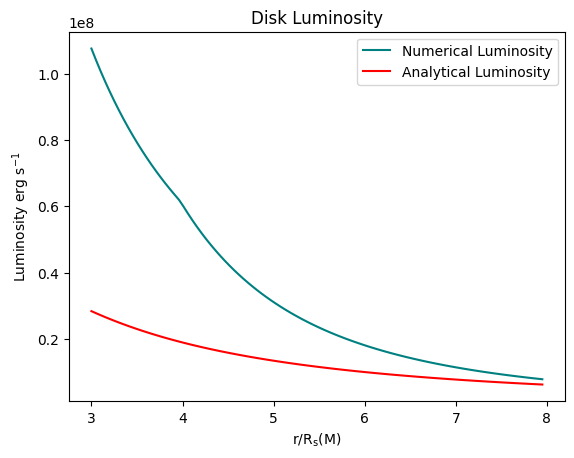

In [16]:
import matplotlib.pyplot as plt

plt.plot(r[0:99],lum, color='teal',label='Numerical Luminosity')
plt.plot(r[0:99],lumana*2.5e5,color='red', label='Analytical Luminosity')
plt.legend()
plt.title("Disk Luminosity")
plt.xlabel('$\mathrm{r/R_s(M)}$')
plt.ylabel('Luminosity erg $\mathrm{s^{-1}}$')

plt.savefig("lumi.png",dpi=300)
files.download("lumi.png") 

In [ ]:
ratio = lum[98] / lumana[98]
ratio

In [ ]:
schwarz(10)

In [ ]:
a = 3*schwarz(10)
schwarz(10)/(a)

In [10]:
def l_ana(a,b,m):
  ra = a*schwarz(m)
  rb = b*schwarz(m)
  mdot = m_edd(m)

  lum = (3*G*m*Msun*mdot/2) * (1/ra*(1-(2/3)*((1/a)**0.5)) - 1/rb*(1-(2/3)*((1/b)**0.5)))
  return lum

In [11]:
lumana = np.array([l_ana(r[i],r[i+1],10) for i in range(len(r)-1)])

In [ ]:
m_edd(10)


In [ ]:
masses = [10,15,20,25,30,35,40]
lum = [ff.luminosity(4,8),ff2.luminosity(4,8),ff3.luminosity(4,8),ff4.luminosity(4,8),ff5.luminosity(4,8),ff6.luminosity(4,8),ff7.luminosity(4,8)]
plt.scatter(masses,lum)
plt.plot(masses,lum)

In [ ]:
ff.luminosity(3,1e7)

In [ ]:
(4*np.pi*G*10*Msun*c*mH)/(sigmaT)

In [13]:
from google.colab import files
#plt.savefig("abc.png")


In [ ]:
plt.plot(ff.r/ff.rg,ff.analytical_middle(0.2)[0],label='$\mathrm{10 M_{\odot}}$')
plt.plot(ff2.r/ff2.rg,ff2.analytical_middle(0.2)[0],label='$\mathrm{15 M_{\odot}}$')
plt.plot(ff3.r/ff3.rg,ff3.analytical_middle(0.2)[0],label='$\mathrm{20 M_{\odot}}$')
plt.plot(ff4.r/ff4.rg,ff4.analytical_middle(0.2)[0],label='$\mathrm{25 M_{\odot}}$')
plt.xlabel('$\mathrm{r/R_s(M)}$')
plt.ylabel('$\mathrm{\Sigma(g/cm^2)}$')
plt.title("Analytical Surface Density")
plt.legend()
plt.savefig("fig1_ana.png",dpi=300)
files.download("fig1_ana.png") 

In [ ]:
3.0e10/0.00040 == 7.5e13

In [ ]:
plt.plot(ff.r/ff.rg,ff.get_sigma_num()[0]*7.5e13,label='$\mathrm{10 M_{\odot}}$')
plt.plot(ff2.r/ff2.rg,ff2.get_sigma_num()[0]*7.5e13,label='$\mathrm{15 M_{\odot}}$')
plt.plot(ff3.r/ff3.rg,ff3.get_sigma_num()[0]*7.5e13,label='$\mathrm{20 M_{\odot}}$')
plt.plot(ff4.r/ff4.rg,ff4.get_sigma_num()[0]*7.5e13,label='$\mathrm{25 M_{\odot}}$')
plt.xlabel('$\mathrm{r/R_s(M)}$')
plt.ylabel('$\mathrm{\Sigma(g/cm^2)}$')
plt.title("Numerical Surface Density")
plt.legend()
plt.savefig("fig1_num.png",dpi=300)
files.download("fig1_num.png") 

In [ ]:
#gas pressure
#pgas = (self.rho*kB*self.Tc)/mH

#radiation pressure
#prad = (4*sigmaT*(self.Tc)**4)/(3*c)
plt.plot(ff.r/ff.rg,)

g*cm/s^2 / cm^2

In [ ]:
# ff.r/ff.rg

In [ ]:
plt.plot(ff.r/ff.rg,4*sigmaT*ff.get_tc_num()**4/(3*c)*1e16,color='red',label="Radiation Pressure")
plt.plot(ff.r/ff.rg,kB*ff.get_rho_num()*ff.get_tc_num()/(mu*mH),color='teal',label="Gas Pressure")
boundary = ff.r[np.argmin(np.abs(4*sigmaT*ff.get_tc_num()**4/(3*c)*1e16 - kB*ff.get_rho_num()*ff.get_tc_num()/(mu*mH)))]/ff.rg
boundary_15 = ff2.r[np.argmin(np.abs(4*sigmaT*ff2.get_tc_num()**4/(3*c)*1e16 - kB*ff2.get_rho_num()*ff2.get_tc_num()/(mu*mH)))]/ff2.rg
boundary_20 = ff3.r[np.argmin(np.abs(4*sigmaT*ff3.get_tc_num()**4/(3*c)*1e16 - kB*ff3.get_rho_num()*ff3.get_tc_num()/(mu*mH)))]/ff3.rg
boundary_25 = ff4.r[np.argmin(np.abs(4*sigmaT*ff4.get_tc_num()**4/(3*c)*1e16 - kB*ff4.get_rho_num()*ff4.get_tc_num()/(mu*mH)))]/ff4.rg
boundary_30 = ff5.r[np.argmin(np.abs(4*sigmaT*ff5.get_tc_num()**4/(3*c)*1e16 - kB*ff5.get_rho_num()*ff5.get_tc_num()/(mu*mH)))]/ff5.rg
boundary_35 = ff6.r[np.argmin(np.abs(4*sigmaT*ff6.get_tc_num()**4/(3*c)*1e16 - kB*ff6.get_rho_num()*ff6.get_tc_num()/(mu*mH)))]/ff6.rg
boundary_40 = ff7.r[np.argmin(np.abs(4*sigmaT*ff7.get_tc_num()**4/(3*c)*1e16 - kB*ff7.get_rho_num()*ff7.get_tc_num()/(mu*mH)))]/ff7.rg


plt.scatter(boundary,(4*sigmaT*ff.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff.get_tc_num()**4/(3*c)*1e16 - kB*ff.get_rho_num()*ff.get_tc_num()/(mu*mH)))]*1e16, color = 'k', s = 10*2)
plt.scatter(boundary_15,(4*sigmaT*ff2.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff2.get_tc_num()**4/(3*c)*1e16 - kB*ff2.get_rho_num()*ff2.get_tc_num()/(mu*mH)))]*1e16, color = 'k', s = 15*2)
plt.scatter(boundary_20,(4*sigmaT*ff3.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff3.get_tc_num()**4/(3*c)*1e16 - kB*ff3.get_rho_num()*ff3.get_tc_num()/(mu*mH)))]*1e16, color = 'k', s = 20*2)
plt.scatter(boundary_25,(4*sigmaT*ff4.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff4.get_tc_num()**4/(3*c)*1e16 - kB*ff4.get_rho_num()*ff4.get_tc_num()/(mu*mH)))]*1e16, color = 'k', s = 25*2)
plt.scatter(boundary_30,(4*sigmaT*ff5.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff5.get_tc_num()**4/(3*c)*1e16 - kB*ff5.get_rho_num()*ff5.get_tc_num()/(mu*mH)))]*1e16, color = 'k', s = 30*2)
plt.scatter(boundary_35,(4*sigmaT*ff6.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff6.get_tc_num()**4/(3*c)*1e16 - kB*ff6.get_rho_num()*ff6.get_tc_num()/(mu*mH)))]*1e16, color = 'k', s = 35*2)
plt.scatter(boundary_40,(4*sigmaT*ff7.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff7.get_tc_num()**4/(3*c)*1e16 - kB*ff7.get_rho_num()*ff7.get_tc_num()/(mu*mH)))]*1e16, color = 'k', s = 40*2)


variation = np.array([(4*sigmaT*ff.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff.get_tc_num()**4/(3*c)*1e16 - kB*ff.get_rho_num()*ff.get_tc_num()/(mu*mH)))]*1e16,
                      (4*sigmaT*ff2.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff2.get_tc_num()**4/(3*c)*1e16 - kB*ff2.get_rho_num()*ff2.get_tc_num()/(mu*mH)))]*1e16,
                      (4*sigmaT*ff3.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff3.get_tc_num()**4/(3*c)*1e16 - kB*ff3.get_rho_num()*ff3.get_tc_num()/(mu*mH)))]*1e16,
                      (4*sigmaT*ff4.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff4.get_tc_num()**4/(3*c)*1e16 - kB*ff4.get_rho_num()*ff4.get_tc_num()/(mu*mH)))]*1e16,
                       (4*sigmaT*ff5.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff5.get_tc_num()**4/(3*c)*1e16 - kB*ff5.get_rho_num()*ff5.get_tc_num()/(mu*mH)))]*1e16,
                      (4*sigmaT*ff6.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff6.get_tc_num()**4/(3*c)*1e16 - kB*ff6.get_rho_num()*ff6.get_tc_num()/(mu*mH)))]*1e16,
                      (4*sigmaT*ff7.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff7.get_tc_num()**4/(3*c)*1e16 - kB*ff7.get_rho_num()*ff7.get_tc_num()/(mu*mH)))]*1e16])



plt.axvline(boundary, linestyle = '--')

plt.ylabel('$\mathrm{Pressure(g cm^{-1} s^{-2})}$')
plt.xlabel('$\mathrm{r/R_s(M)}$')
#plt.fill_between(np.array(ff.r/ff.rg),0,1)
plt.fill_betweenx([0, 6000], 4, boundary, color='red', alpha=0.2)
plt.fill_betweenx([0, 6000], boundary, 8, color='teal', alpha=0.2)
plt.text(boundary + 0.05, 2900, "Dividing Line",rotation = 90)
plt.scatter(boundary,(4*sigmaT*ff.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff.get_tc_num()**4/(3*c)*1e16 - kB*ff.get_rho_num()*ff.get_tc_num()/(mu*mH)))]*1e16, color = 'k', s = 10)
plt.plot([boundary,boundary_15,boundary_20,boundary_25,boundary_30,boundary_35,boundary_40], variation, linestyle = '--', label = "$\mathrm{R_{boundary}}$ vs $\mathrm{P_{boundary}}$ for linearly scaled BH Mass")
plt.text(6.0,3000, "Gas Pressure Dominated")
plt.text(4.3,500, "Radiation Pressure Dominated", rotation = 90, fontsize = 10)
plt.xlim(4,8)
plt.ylim(0,6000)
plt.legend(fontsize = 8, loc= "upper center")
plt.title("Numerical Pressure for M = $10 M_{\odot}$")
plt.savefig("fig2_num.png",dpi=300)
files.download("fig2_num.png") 
#plt.plot(ff2.r/ff2.rg,ff2.get_tc_num()**4,color='red')

In [ ]:
boundary_15

In [ ]:
(4*sigmaT*ff2.get_tc_num()**4/(3*c))[np.argmin(np.abs(4*sigmaT*ff2.get_tc_num()**4/(3*c)*1e16 - kB*ff2.get_rho_num()*ff2.get_tc_num()/(mu*mH)))]*1e16

In [ ]:
# ((3*ff.get_rho_num()*kB*c)/(4*mu*mH*sigmaT))**(1/3)

In [ ]:
# ff.get_tc_num()

In [ ]:
((3*ff.rho*kB*c)/(4*mu*mH*sigmaT))**(1/3)

In [ ]:
ff.luminosity(4,5)

In [ ]:
ff.luminosity(4,5)

In [ ]:
23630433.144573964/ff.rg

In [ ]:
ff.get_bdry()[0]/ff.rg

In [ ]:
a,b = ff.get_energy()

In [ ]:
ff.tc_num(4*ff.rg)

In [ ]:
ff.get_tc_num()[0]

In [ ]:
ff.tc_num(6)

In [ ]:
v,dr,sig,r,rarray = ff.energy(8)

In [ ]:
vall = 5
sigma = sig[np.argmin(np.abs(ff.r / ff.rg - 5))]

In [ ]:
np.argmin(np.abs(ff.r / ff.rg - 5))

In [ ]:
plt.plot(np.linspace(4,4.001,1000),ff.testing())

In [ ]:
energy = ff.get_energy()
energy

In [ ]:
energy[1]

In [ ]:
# ff.get_sigma_num()[1] < 5907608.286143491

In [ ]:
ff.get_bdry()[0]/schwarz(10)

In [ ]:
tau = ff.get_sigma_num()

In [ ]:
ff.tc_num()

In [ ]:
tc = ff.get_tc_num()
tc

In [ ]:
np.shape(tc)

In [ ]:
bdry,fff=ff.get_bdry()

In [ ]:
bdry/schwarz(10)

In [ ]:
fff / schwarz(10)

In [ ]:


jj = []
rr = np.arange(4,10,1)
light = np.array([ff.luminosity(3,i) for i in rr])
plt.plot(rr,light)
plt.xlabel(r"${R}/{R_{Schwarz}(M)}$")
plt.ylabel("Luminosity")

PLOT 2 - luminosity - as you get further away, the luminosity increases - it's cummulative luminosity 

In [ ]:
np.argmin([2,1,3])

In [ ]:
ff.energy(3)

In [ ]:
jj = []
rr = np.arange(4,10,1)
light = np.array([ff.energy(i) for i in rr])
plt.plot(rr,light)
plt.xlabel(r"${R}/{R_{Schwarz}(M)}$")
plt.ylabel("Luminosity")

In [ ]:
#ff.energy(3)
#ff.energy(np.array([1,2,3]))
ff.luminosity(3,4)

In [ ]:
ff.numerical_middle_sigma(7,8)

In [ ]:
ff.luminosity(3,4)

In [ ]:
G*10*Msun*m_edd(10) / 2*schwarz(10)

In [ ]:
a,b,c = ff.energy(3)

In [ ]:
b

In [ ]:
c

In [ ]:
a

In [ ]:
ff.omegaprimes(3)

# Can one of you program in the different regions of the disc?

So in the class above, just program in the different regions of the disc. What this means firstly is the following:
1) First as a check, add a condition that if ANY of the '$r_{out}$' we are inputting is less than $3*R_g$ where $R_g$ is the Schwarzschild radius, just do calculations by assuming that all values at those 'r' is ZERO. Probably add this in the ${__init__}$ in the class above.

2) Secondly, we need to define different regions of the disc. The inner, middle and outer regions. Again, as a first step, just add a condition that '$r_{out}$' between 3 and 5 is inner disc, so that the pressure is ${self.P = gas_p}$ and $\Kappa$ is the electron scattering thing (check notes and https://personal.sron.nl/~kaastra/leiden2017/lnotes_part7.pdf for proper values). Between r 5 and 8 is middle, and beyond 8 is outer. Just do this for now, we will worry about being accurate later.


Things to get finished today (Tuesday) in total:
1) Add the radiation formula or whatever so we can start plotting stuff out. This will take a while to do because the energy loss is another part of the notes, there is an integration there, and another thing is energy is divided into motion and radiation. ~ Shobhit
2) Need to add the RK4 method to the class and test that it works and shit isn't breaking

In [ ]:
#testing if dr is a smooth function or not; will use an appropriate integration method based on that

import numpy as np
import matplotlib.pyplot as plt
def fg(R):
  G = 1
  m = 1
  mdot = 1

  ds = (3*G*m*mdot)/(8*np.pi*R**3) * (1 - (1/R)**0.5)
  return ds

r = np.linspace(4,20,1000)
dd = fg(r)
plt.plot(r,dd)

In [ ]:
def q(m,mdot,r):
    rstar = 3
    tt = 3*(1-(rstar/r**0.5)) / (8*np.pi*r**3)
    return tt

In [ ]:
rr = np.linspace(1,100,1000)
y = q(10,m_edd(10),rr)
plt.plot(rr,y)

In [ ]:
import numpy
M, M_dot, nu, r_out, r_in=3

In [ ]:
x = np.linspace(3,8,1000)
y = np.linspace(3,8,1000)

xu,yu = np.meshgrid(x,y)
r = np.sqrt(xu**2 + yu**2)

r

In [ ]:
len(s)

In [ ]:
s,r,_=ff.get_sigma_num()
s2,r2,_=ff2.get_sigma_num()
s3,r3,_=ff3.get_sigma_num()

PLOT 1 = SURFACE DENSITY AS A FUNCTION OF SWARTZCHILD RADIUS - VARYING FOR DIFFERENT BLACK HOLE MASSES, SAME PLOT FOR DIFFERENT VARIABLES (3/4 PLOTS)


In [ ]:
plt.plot(r/schwarz(10),s,label="10 Solar Mass")
plt.plot(r2/schwarz(20),s2,label="20 Solar Mass")
plt.plot(r3/schwarz(30),s3,label="30 Solar Mass")
plt.legend()

In [ ]:
sigma,Tc,H,rho,tau,vr = ff.analytical_middle()

In [ ]:
plt.plot(r,ff.analytical_middle()[3]*ff.analytical_middle()[2])

In [ ]:
plt.plot(r,SS.analytical_middle(10,m_edd(10)/Msun,0.2,r)[0])

In [ ]:
class trial:
    
    def __init__(self,a,b,c):
        self.x = 2 + b
        self.y = self.x**2 
        self.z = self.x + self.y
    def out(self):
        return (self.x,self.y,self.z)
    
    def testing(self,extra):
      return self.x + extra
    
    def test2(self):
      return self.testing()

    def test3(self,x,y):
      return(x+y)

In [ ]:
gg = trial(1,2,3)
gg.test3(43.2,0.8)

In [ ]:
m_edd(10)/Msun